In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('StampPrices.csv')
df.head()

,DIG,JDR,SRO,Document Count,Stamp Duty,Registration Fees,FY Year,Month,Year,Application,SRO Short Name,Article/Project Name
0,Amravati,Akola,Joint S.R.Akola 1,2,1000.0,200,FY 2024-25,January,2025,1 i-Sarita,AKN,Affidavit
1,Amravati,Akola,Joint S.R.Akola 1,3,1500.0,300,FY 2024-25,February,2025,1 i-Sarita,AKN,Affidavit
2,Amravati,Akola,Joint S.R.Akola 1,4,2000.0,400,FY 2024-25,March,2025,1 i-Sarita,AKN,Affidavit
3,Amravati,Akola,Joint S.R.Akola 1,3,1500.0,300,FY 2025-26,April,2025,1 i-Sarita,AKN,Affidavit
4,Amravati,Akola,Joint S.R.Akola 1,4,2000.0,400,FY 2025-26,May,2025,1 i-Sarita,AKN,Affidavit


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69742 entries, 0 to 69741
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DIG                   69742 non-null  object 
 1   JDR                   69742 non-null  object 
 2   SRO                   69742 non-null  object 
 3   Document Count        69742 non-null  int64  
 4   Stamp Duty            69742 non-null  float64
 5   Registration Fees     69742 non-null  int64  
 6   FY Year               69742 non-null  object 
 7   Month                 69742 non-null  object 
 8   Year                  69742 non-null  int64  
 9   Application           69742 non-null  object 
 10  SRO Short Name        69742 non-null  object 
 11  Article/Project Name  69742 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 6.4+ MB


In [5]:
df.describe()

,Document Count,Stamp Duty,Registration Fees,Year
count,69742.000000,6.974200e+04,6.974200e+04,69742.0
mean,20.511370,2.967146e+06,1.714587e+05,2025.0
std,50.494436,2.207200e+07,7.536505e+05,0.0
min,1.000000,0.000000e+00,1.000000e+02,2025.0
25%,1.000000,2.000000e+03,9.000000e+02,2025.0
50%,4.000000,2.954500e+04,1.080000e+04,2025.0
75%,15.000000,4.068150e+05,6.000000e+04,2025.0
max,1002.000000,1.303532e+09,2.826427e+07,2025.0


In [6]:
df.nunique().sort_values(ascending=False)

Stamp Duty              22465
Registration Fees       16900
Document Count            520
SRO                       386
SRO Short Name            386
Article/Project Name       40
JDR                        31
DIG                         7
Month                       7
FY Year                     2
Year                        1
Application                 1
dtype: int64

Text(0.5, 0, 'Project names')

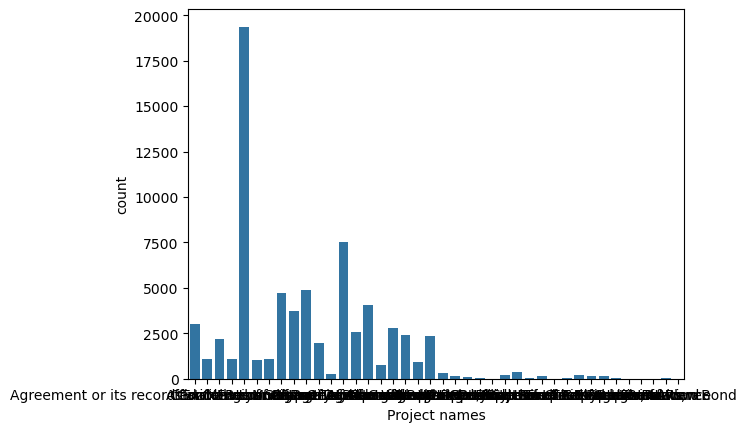

In [7]:
sns.countplot(data = df, x = 'Article/Project Name')
plt.xlabel("Project names")

<Axes: xlabel='FY Year', ylabel='count'>

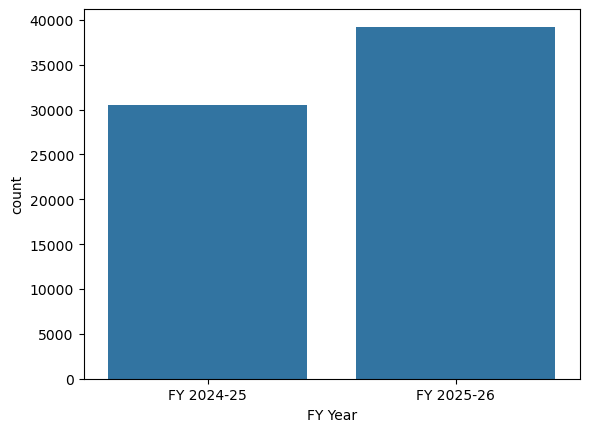

In [8]:
sns.countplot(data = df, x = 'FY Year')

In [9]:
df = df.drop(columns=['SRO','SRO Short Name','Year','Application'], axis = 1)

In [10]:
df.head()

,DIG,JDR,Document Count,Stamp Duty,Registration Fees,FY Year,Month,Article/Project Name
0,Amravati,Akola,2,1000.0,200,FY 2024-25,January,Affidavit
1,Amravati,Akola,3,1500.0,300,FY 2024-25,February,Affidavit
2,Amravati,Akola,4,2000.0,400,FY 2024-25,March,Affidavit
3,Amravati,Akola,3,1500.0,300,FY 2025-26,April,Affidavit
4,Amravati,Akola,4,2000.0,400,FY 2025-26,May,Affidavit


In [11]:
train_val_df, test_df = train_test_split(df,test_size=0.2,random_state=37)
train_df,val_df = train_test_split(train_val_df,test_size= 0.25,random_state= 37)

In [12]:
target_cols = 'Stamp Duty'
input_cols = [col for col in train_df.columns if col != target_cols]


In [13]:
input_cols, target_cols

(['DIG',
  'JDR',
  'Document Count',
  'Registration Fees',
  'FY Year',
  'Month',
  'Article/Project Name'],
 'Stamp Duty')

In [14]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_cols].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_cols].copy()

test_inputs = test_df[input_cols].copy()
test_targets= test_df[target_cols].copy()

In [15]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()
numeric_cols,categorical_cols

(['Document Count', 'Registration Fees'],
 ['DIG', 'JDR', 'FY Year', 'Month', 'Article/Project Name'])

In [16]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

train_inputs_encoded = preprocessor.fit_transform(train_inputs)
val_inputs_encoded = preprocessor.transform(val_inputs)
test_inputs_encoded = preprocessor.transform(test_inputs)

c:\Users\Kshitiz\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [17]:
model = LinearRegression()
model.fit(train_inputs_encoded, train_targets)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
train_preds = model.predict(train_inputs_encoded)
val_preds = model.predict(val_inputs_encoded)
test_preds = model.predict(test_inputs_encoded)

In [19]:
def predict_stamp_duty(new_data_df):
    new_data_encoded = preprocessor.transform(new_data_df[input_cols])
    predictions = model.predict(new_data_encoded)
    return predictions

In [20]:
model.score(val_inputs_encoded,val_targets)

0.6122732146468262

In [21]:
model.score(test_inputs_encoded,test_targets)

0.5741129290737778

In [22]:
##Pretty Bad accuracy with 61 and 57%, maybe we gotta do polynomial regression on this to imporve the accuracy